In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab02.ipynb")

# Lab 02: Pandas
## Due Date: Sunday, June 23rd, 11:59pm

To receive credit for a lab, answer all questions correctly and submit before the deadline.

You must submit this assignment to Gradescope by the on-time deadline, Sunday, June 23rd, 11:59pm. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted. While course staff is happy to help you if you encounter difficulties with submission, we may not be able to respond to late-night requests for assistance (TAs need to sleep, after all!). **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to contact staff for submission support. 

### Lab Walk-Through
In addition to the lab notebook, we have also released a prerecorded walk-through video of the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the video.
<br>
**Note:** This video is recorded in Spring 2022. There may be slight inconsistencies between the version you are viewing vesus the version used in the recording, but content is identical.

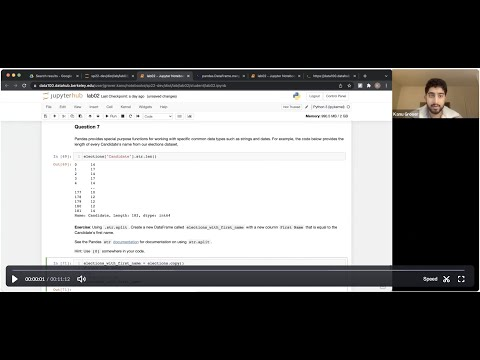

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("MLUNk_D7KW0", list = 'PLQCcNQgUcDfoWO3WVtznI7CBJmtNUqbAN', listType = 'playlist')

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (It's a good way to learn your classmates' names too!)

**Collaborators**: *list collaborators here*

---
[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will review commonly used data-wrangling operations/tools in `pandas`. We aim to give you familiarity with:

* Creating `DataFrames`,
* Slicing `DataFrames` (i.e., selecting rows and columns)
* Filtering data (using boolean arrays)

In this lab, you are going to use several `pandas` methods. Reminder from lecture that you may press `shift+tab` on method parameters to see the documentation for that method. For example, if you were using the `drop` method in `pandas`, you could press `shift+tab` to see what `drop` is expecting.

`pandas` is very similar to the `datascience` library that you saw in Data 8. This [conversion notebook](https://data100.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FDS-100%2Fsu23-materials&branch=main&urlpath=lab%2Ftree%2Fsu23-materials%2Flec%2Flec02%2Fdata8_translation_examples.ipynb) may serve as a useful guide!

This lab expects that you have watched the `Pandas I` and `II` lectures. If you have not, this lab will probably take a very long time.

**Note**: The `pandas` interface is notoriously confusing for beginners, and the documentation is not consistently great. Throughout the semester, you will have to search through `pandas` documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

**This assignment seems long, but rest assured that a large part of it is a tutorial (i.e., we will guide you through many aspects of using `pandas` in the most efficient way possible!).**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
%matplotlib inline

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### **REVIEW:** Creating `DataFrames` & Basic Manipulations

Recall that a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) is a table in which each column has a specific data type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

Usually, you'll create `DataFrames` by using a function like `pd.read_csv`. However, in this section, we'll discuss how to create them from scratch.

The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for the `pandas` `DataFrame` class provides several constructors for the `DataFrame` class.

**Syntax 1:** You can create a `DataFrame` by specifying the columns and values using a dictionary, as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [4]:
fruit_info = pd.DataFrame(
    data = {'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink'],
          'price': [1.0, 0.75, 0.35, 0.05]
          })
fruit_info

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35
3,raspberry,pink,0.05


**Syntax 2:** You can also define a `DataFrame` by specifying the rows as shown below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [5]:
fruit_info2 = pd.DataFrame(
    [("red", "apple", 1.0), ("orange", "orange", 0.75), ("yellow", "banana", 0.35),
     ("pink", "raspberry", 0.05)], 
    columns = ["color", "fruit", "price"])
fruit_info2

,color,fruit,price
0,red,apple,1.00
1,orange,orange,0.75
2,yellow,banana,0.35
3,pink,raspberry,0.05


You can obtain the dimensions of a `DataFrame` by using the shape attribute `DataFrame.shape`.

In [6]:
fruit_info.shape

(4, 3)

You can also convert the entire `DataFrame` into a two-dimensional `NumPy` array. Remember that a `NumPy` array can hold homogenous data whereas a `DataFrame` can contain heterogeneous data. 

In [7]:
numbers = pd.DataFrame({"A":[1, 2, 3], "B":[0, 1, 1]})
numpy_numbers = numbers.to_numpy()

print(type(numpy_numbers))
print(numpy_numbers)

<class 'numpy.ndarray'>
[[1 0]
 [2 1]
 [3 1]]


The `values` attribute returns the content of the `DataFrame` in the form of a list of lists.

In [8]:
fruit_info.values

array([['apple', 'red', 1.0],
       ['orange', 'orange', 0.75],
       ['banana', 'yellow', 0.35],
       ['raspberry', 'pink', 0.05]], dtype=object)

There are other constructors but we do not discuss them here.

### **REVIEW:** Selecting Rows and Columns in `pandas`

As you've seen in lecture and discussion, there are two verbose operators in Python for selecting rows: `loc` and `iloc`. Let's review them briefly.

**Approach 1:** `loc`

The first of the two verbose operators is `loc`, which takes two arguments. The first is one or more **row labels**, the second is one or more **column labels** - both of which are displayed in bold to the left of each of the rows and above each of the columns, respectively. These are not the same as positional indices, which are used for indexing Python lists or `NumPy` arrays!

The desired rows or columns can be provided individually, in slice notation, or as a list. Some examples are given below.

Note that **slicing in `loc` is inclusive** on the provided labels.

In [9]:
# Get rows 0 through 2 (inclusive) with labels 'fruit' through 'price' (which would include the color column that is in between both labels)
fruit_info.loc[0:2, 'fruit':'price']

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35


In [10]:
# Get rows 0 through 2 (inclusive) and columns 'fruit' and 'price'. 
# Note the difference in notation and result from the previous example.
fruit_info.loc[0:2, ['fruit', 'price']]

,fruit,price
0,apple,1.00
1,orange,0.75
2,banana,0.35


In [11]:
# Get rows 0 and 2 and columns fruit and price. 
fruit_info.loc[[0, 2], ['fruit', 'price']]

,fruit,price
0,apple,1.00
2,banana,0.35


In [12]:
# Get rows 0 and 2 and column fruit
fruit_info.loc[[0, 2], ['fruit']]

,fruit
0,apple
2,banana


Note that if we request a single column but don't enclose it in a list, the return type of the `loc` operator is a `Series` rather than a `DataFrame`. 

In [ ]:
# Get rows 0 and 2 and column fruit, returning the result as a Series
fruit_info.loc[[0, 2], 'fruit']

If we provide only one argument to `loc`, it uses the provided argument to select rows, and returns all columns.

In [ ]:
fruit_info.loc[0:1]

Note that if you try to access columns without providing rows, `loc` will crash. 

In [ ]:
# Uncomment, this code will crash
#fruit_info.loc[["fruit", "price"]]

# Uncomment, this code works fine: 
#fruit_info.loc[:, ["fruit", "price"]]

<br/>

**Approach 2:** `iloc`

`iloc` is very similar to `loc` except that its arguments are **row numbers** and **column numbers**, rather than row and column labels. A useful mnemonic is that the `i` stands for "integer". This is quite similar to indexing into a Python `list` or `NumPy` array.

In addition, **slicing for `iloc` is exclusive** on the provided integer indices. Some examples are given below:

In [ ]:
# Get rows 0 through 3 (exclusive) and columns 0 through 3 (exclusive)
fruit_info.iloc[0:3, 0:3]

In [ ]:
# Get rows 0 through 3 (exclusive) and columns 0 and 2.
fruit_info.iloc[0:3, [0, 2]]

In [ ]:
# Get rows 0 and 2 and columns 0 and 2.
fruit_info.iloc[[0, 2], [0, 2]]

In [ ]:
# Get rows 0 and 2 and column fruit
fruit_info.iloc[[0, 2], [0]]

In [ ]:
# Get rows 0 and 2 and column fruit
fruit_info.iloc[[0, 2], 0]

Note that in these `loc` and `iloc` examples above, the row **label** and row **number** were always the same.

Let's see an example where they are different. If we sort our fruits by price, we get:

In [ ]:
fruit_info_sorted = fruit_info.sort_values("price")
fruit_info_sorted

After sorting, note how row number 0 now has index label 3, row number 1 now has index label 2, etc. These indices are the arbitrary numerical indices generated when we created the `DataFrame`. For example, `banana` was originally in row 2, and so it has row label 2. Note the distinction between the index _label_, and the actual index _position_.

If we request the rows in positions 0 and 2 using `iloc`, we're indexing using the row NUMBERS, not labels. 

In [ ]:
fruit_info_sorted.iloc[[0, 2], 0]

Lastly, similar to `loc`, the second argument to `iloc` is optional. That is, if you provide only one argument to `iloc`, it treats the argument you provide as a set of desired row numbers, not column numbers.

In [ ]:
fruit_info_sorted.iloc[[0, 2]]

**Approach 3:** `[]` Notation for Accessing Rows and Columns

`pandas` also supports the `[]` operator. It's similar to `loc` in that it lets you access rows and columns by their name.

However, unlike `loc`, which takes row names and also optionally column names, `[]` is more flexible. If you provide it only row names, it'll give you rows (same behavior as `loc`), and if you provide it with only column names, it'll give you columns (whereas `loc` will crash).

Some examples:

In [ ]:
fruit_info[0:2]

In [ ]:
# Here we're providing a list of fruits as single argument to []
fruit_info[["fruit", "color", "price"]]

Note that slicing notation is not supported for columns if you use `[]` notation. Use `loc` instead.

In [ ]:
# Uncomment and this code crashes
#fruit_info["fruit":"price"]

# Uncomment and this works fine
#fruit_info.loc[:, "fruit":"price"]

`[]` and `loc` are quite similar. For example, the following two pieces of code are functionally equivalent for selecting the fruit and price columns.

1. `fruit_info[["fruit", "price"]]` 
2. `fruit_info.loc[:, ["fruit", "price"]]`.

Because it yields more concise code, you'll find that our code and your code both tend to feature `[]`. However, there are some subtle pitfalls of using `[]`. If you're ever having performance issues, weird behavior, or you see a `SettingWithCopyWarning` in `pandas`, switch from `[]` to `loc`, and this may help.

To avoid getting too bogged down in indexing syntax, we'll avoid a more thorough discussion of `[]` and `loc`. We may return to this at a later point in the course.

For more on `[]` vs. `loc`, you may optionally try reading:
1. https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte
2. https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc/65875826#65875826
3. https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas/53954986#53954986

Now that we've reviewed basic indexing, let's discuss how we can modify `DataFrames`. We'll do this via a series of exercises. 

<br/><br/>

---

### Question 1a

For a `DataFrame` `d`, you can add a column with `d['new column name'] = ...` and assign a `list` or `array` of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table, which expresses **your personal preference** about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). There is no right order, it is completely your choice of rankings.


In [ ]:
...
fruit_info

In [ ]:
grader.check("q1a")

<br/><br/>

---

### Question 1b

You can also add a column to `d` with `d.loc[:, 'new column name'] = ...`. As above, the first parameter is for the rows, and the second is for columns. The `:` means changing all rows, and the `'new column name'` indicates the name of the column you are modifying (or, in this case, adding). 

Add a column called `rank2` to the `fruit_info` table, which contains the same values in the same order as the `rank1` column.


In [ ]:
...
fruit_info

In [ ]:
grader.check("q1b")

<br/><br/>

---

### Question 2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) both the `rank1` and `rank2` columns you created. Make sure to use the `axis` parameter correctly. Note that `drop` does not change a table but instead returns a new table with fewer columns or rows unless you set the optional `inplace` argument.

**Hint:** Look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) to see how you can drop multiple columns of a `DataFrame` at once using a list of column names.


In [ ]:
fruit_info_original = ...
fruit_info_original

In [ ]:
grader.check("q2")

<br/><br/>

---

### Question 3

Use the `.rename()` method to rename the columns of `fruit_info_original` so they begin with capital letters. Set this new `DataFrame` to `fruit_info_caps`. For an example of how to use rename, see this linked [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

In [ ]:
...
fruit_info_caps

In [ ]:
grader.check("q3")

<br/><br/>


### Babynames Dataset
For the next few questions of this lab, let's move on to a real-world dataset. We'll be using the babynames dataset from Lecture 3. The babynames dataset contains a record of the given names of babies born in the United States each year.

Let's run the following cells to build the `DataFrame` `babynames`. Note that we only include data from California due to memory constraints (the full dataset has over 6 million rows!). There should be a total of 407428 records.


In [ ]:
file_path = 'data/namesbystate_ca.txt.gz'
column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

babynames = pd.read_csv(file_path, names=column_labels)

**Important Note**: If you are following the Lab Walkthrough Video, your outputs for the rest of the questions might look slightly different than the ones in the video (since our `DataFrame` only contains data where the state is California). Do not worry about this! If your code passes the autograder test cases, then it is correct.

In [ ]:
len(babynames)

In [ ]:
babynames.head()

#### Selection Examples on Baby Names

As with our synthetic fruit dataset, we can use `loc` and `iloc` to select rows and columns of interest from our dataset.

In [ ]:
babynames.loc[2:5, 'Name']

Notice the difference between the following cell and the previous one; just passing in `'Name'` returns a `Series` while `['Name']` returns a `DataFrame`.

In [ ]:
babynames.loc[2:5, ['Name']]

The code below collects the rows in positions 1 through 3, and the column in position 3 ("Name").

In [ ]:
babynames.iloc[1:4, [3]]

<br/><br/>

---

### Question 4a

Use `.loc` to select `Name` and `Year` **in that order** from the `babynames` table.


In [ ]:
name_and_year = ...
name_and_year[:5]

In [ ]:
grader.check("q4a")

<br/><br/>

---

### Question 4b
Now repeat the same selection using the plain `[]` notation.

In [ ]:
name_and_year = ...
name_and_year[:5]

In [ ]:
grader.check("q4b")

### **REVIEW**: Filtering with boolean arrays

Filtering is the process of removing unwanted entries. In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your dataset. Example usage looks like `df[df['column name'] < 5]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
&gt;=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

As an example, in the following, we construct a `DataFrame` containing only rows where the name is Arman.

In [ ]:
arman_babynames = babynames[babynames['Name'] == 'Arman']
arman_babynames.head(5)

<br/><br/>

---
### Question 5
Using a boolean array, select the names in Year 2000 (from `babynames`) that have larger than 3000 counts. Keep all columns from the original `babynames` `DataFrame`.

_Note_: Note that compound expressions have to be grouped with parentheses. That is, any time you use `p & q` to filter the `DataFrame`, make sure to use `df[(df[p]) & (df[q])]` or `df.loc[(df[p]) & (df[q])]`. 

You may use either `[]` or `loc`. Both will achieve the same result. For more on `[]` vs. `loc`, see the stack overflow links from the intro portion of this lab.

In [ ]:
result = ...
result.head()

In [ ]:
grader.check("q5")

### **REVIEW:** `str`

`pandas` provides special purpose functions for working with specific common data types such as strings and dates. For example, the code below provides the length of every baby's name from our `babynames` dataset. 

In [ ]:
babynames['Name'].str.len()

<br/><br/>

---

### Question 6a

Add a column to `babynames` named `First Letter` that contains the first letter of each baby's name.

Hint: you can index using `.str` similarly to how you'd normally index Python strings. Or, you can use `.str.get` [(documentation here)](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get.html).

**Reminder**: If you are following the Lab Walkthrough Video, your outputs for questions 4-6 might look slightly different than the ones in the video.

In [ ]:
...
babynames

In [ ]:
grader.check("q6a")

<br/><br/>

---

### Question 6b

In 2022, how many babies had names that started with the letter "A"? 

In [ ]:
babynames_2022 = ...
just_A_names_2022 = ...
number_A_names = ...
number_A_names

In [ ]:
grader.check("q6b")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Lab 02!

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSe0fBEJwt6aEfZxU3fh3llNk8rSWHj6Umq0km3wPqmFu0MlGA/viewform). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)